In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Flight_price_dataset.csv')
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#Data Visualization and Analysis && Preprocessing 

In [ ]:
dataset.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [ ]:
dataset['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

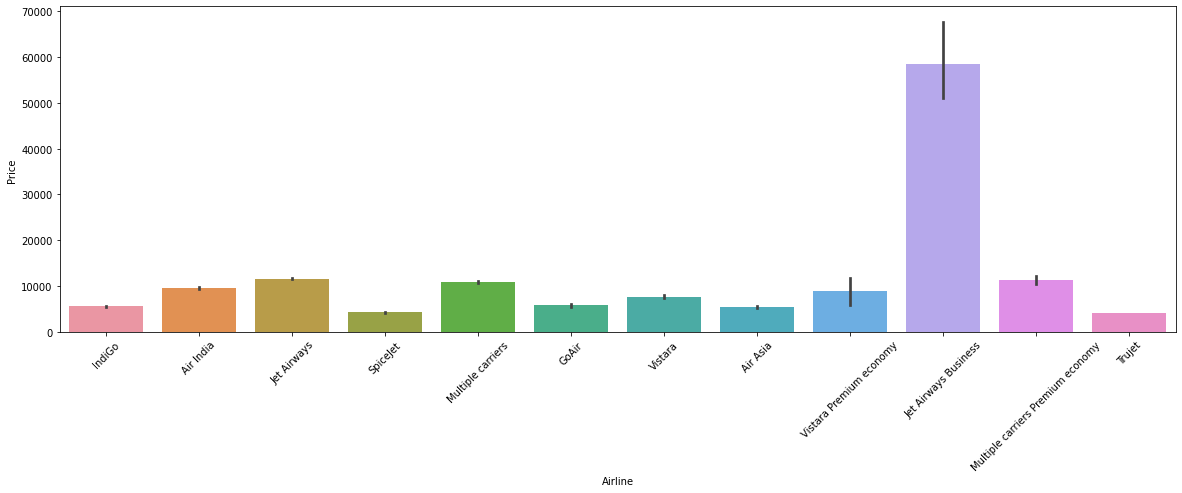

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=dataset , x='Airline',y='Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dataset=dataset[ dataset['Airline'] != 'Trujet']

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
labelencoder=LabelEncoder()
dataset['Airline']=labelencoder.fit_transform(dataset['Airline'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,1,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,4,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,9,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dataset['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [ ]:
dataset['Source'] = labelencoder.fit_transform(dataset['Source'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,1,27/04/2019,3,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,4,27/04/2019,0,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,9,01/03/2019,0,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dataset['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
dataset['Destination']=labelencoder.fit_transform(dataset['Destination'])

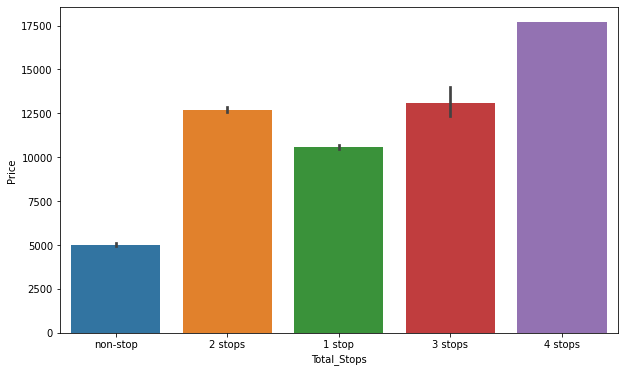

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset ,  x='Total_Stops' , y='Price')
plt.show()


In [ ]:
dataset['Total_Stops'] = labelencoder.fit_transform(dataset['Total_Stops'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,No info,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,No info,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,No info,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,4,No info,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,4,No info,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,4,No info,7229
10681,9,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,4,No info,12648


In [ ]:
dataset['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
dataset['Additional_Info'] = dataset['Additional_Info'].replace('No Info','No info')
dataset['Additional_Info'] = dataset['Additional_Info'].replace(['2 long layover', '1 short layover' , 'Red-eye flight'],'Rare')
dataset['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Rare                               1
2 Long layover                     1
Name: Additional_Info, dtype: int64

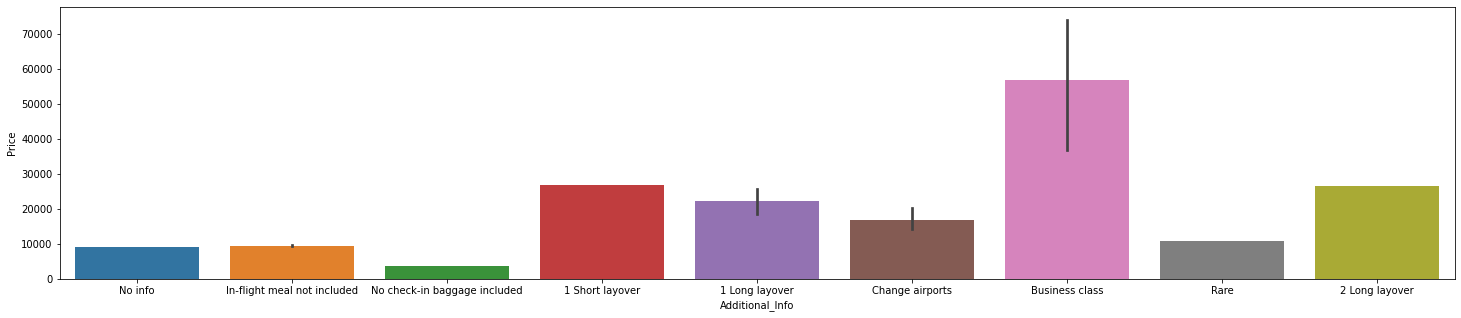

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(data=dataset , x='Additional_Info' , y='Price')
plt.show()

In [ ]:
dataset['Additional_Info']=labelencoder.fit_transform(dataset['Additional_Info'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,7,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,7,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,7,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,7,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,7,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,4,7,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,4,7,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,4,7,7229
10681,9,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,4,7,12648


In [ ]:
dataset['Duration'] = dataset['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,170,4,7,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,445,1,7,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,1,7,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,325,0,7,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,285,0,7,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,150,4,7,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,155,4,7,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,180,4,7,7229
10681,9,01/03/2019,0,5,BLR → DEL,11:30,14:10,160,4,7,12648


In [ ]:
dataset['Date_of_Journey'] = pd.to_datetime(dataset['Date_of_Journey'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10 22 Mar,170,4,7,3897
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,445,1,7,7662
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,1,7,13882
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,325,0,7,6218
4,3,2019-01-03,0,5,BLR → NAG → DEL,16:50,21:35,285,0,7,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,3,0,CCU → BLR,19:55,22:25,150,4,7,4107
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,155,4,7,4145
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,180,4,7,7229
10681,9,2019-01-03,0,5,BLR → DEL,11:30,14:10,160,4,7,12648


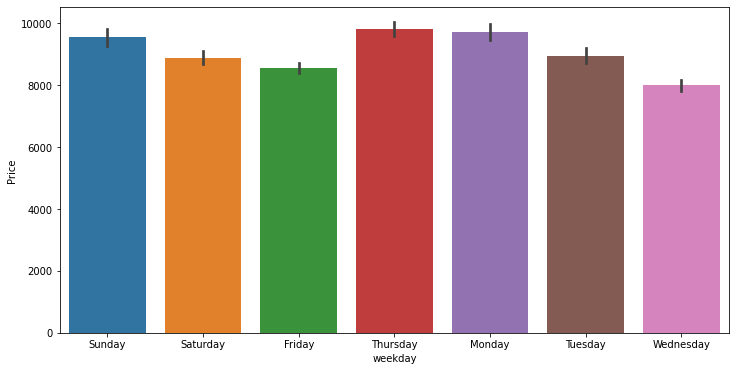

In [ ]:
dataset['weekday']=dataset['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12,6))
sns.barplot(data=dataset , x='weekday', y='Price')
plt.show()


In [ ]:
dataset['weekday'] = labelencoder.fit_transform(dataset['weekday'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10 22 Mar,170,4,7,3897,3
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,445,1,7,7662,2
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,1,7,13882,0
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,325,0,7,6218,4
4,3,2019-01-03,0,5,BLR → NAG → DEL,16:50,21:35,285,0,7,13302,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,3,0,CCU → BLR,19:55,22:25,150,4,7,4107,6
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,155,4,7,4145,2
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,180,4,7,7229,2
10681,9,2019-01-03,0,5,BLR → DEL,11:30,14:10,160,4,7,12648,4


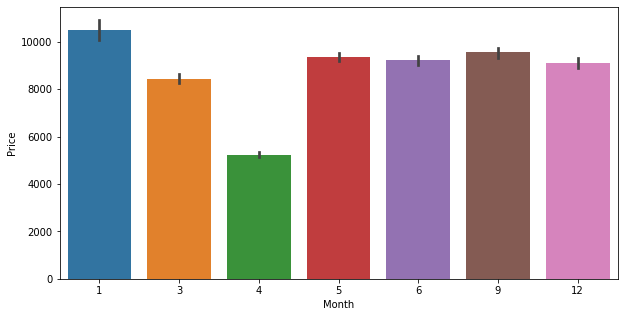

In [ ]:
dataset['Month'] = dataset['Date_of_Journey'].dt.month

plt.figure(figsize=(10,5))
sns.barplot(data=dataset , x='Month' , y='Price')
plt.show()

In [ ]:
dataset['Month'] = labelencoder.fit_transform(dataset['Month'])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,Month
0,3,2019-03-24,0,5,BLR → DEL,22:20,01:10 22 Mar,170,4,7,3897,3,1
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,445,1,7,7662,2,0
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,1,7,13882,0,5
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,325,0,7,6218,4,6
4,3,2019-01-03,0,5,BLR → NAG → DEL,16:50,21:35,285,0,7,13302,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,3,0,CCU → BLR,19:55,22:25,150,4,7,4107,6,5
10679,1,2019-04-27,3,0,CCU → BLR,20:45,23:20,155,4,7,4145,2,2
10680,4,2019-04-27,0,2,BLR → DEL,08:20,11:20,180,4,7,7229,2,2
10681,9,2019-01-03,0,5,BLR → DEL,11:30,14:10,160,4,7,12648,4,0


In [ ]:
dataset.drop(columns = ['Date_of_Journey', 'Route' , 'Arrival_Time' , 'Dep_Time'], axis=1 ,inplace=True)
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,weekday,Month
0,3,0,5,170,4,7,3897,3,1
1,1,3,0,445,1,7,7662,2,0
2,4,2,1,1140,1,7,13882,0,5
3,3,3,0,325,0,7,6218,4,6
4,3,0,5,285,0,7,13302,4,0
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,7,4107,6,5
10679,1,3,0,155,4,7,4145,2,2
10680,4,0,2,180,4,7,7229,2,2
10681,9,0,5,160,4,7,12648,4,0


In [ ]:
dataset=dataset[['Airline','Source','Destination','Duration','Total_Stops','Additional_Info','weekday','Month','Price']]
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month,Price
0,3,0,5,170,4,7,3,1,3897
1,1,3,0,445,1,7,2,0,7662
2,4,2,1,1140,1,7,0,5,13882
3,3,3,0,325,0,7,4,6,6218
4,3,0,5,285,0,7,4,0,13302
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,7,6,5,4107
10679,1,3,0,155,4,7,2,2,4145
10680,4,0,2,180,4,7,2,2,7229
10681,9,0,5,160,4,7,4,0,12648


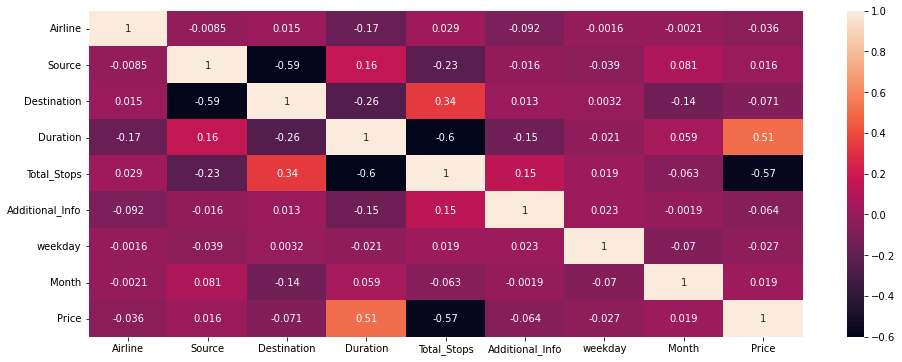

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(dataset.corr() , annot=True)
plt.show()

#Splitting the Dataset

In [ ]:
data_arr = dataset.values
X = data_arr[ : , 0:8]
Y = data_arr[ : , 8] 

Rescaling the data using a normalizer

In [ ]:
normalizer=Normalizer()
rescaled_X=normalizer.fit_transform(X)
rescaled_X

array([[0.01761387, 0.        , 0.02935646, ..., 0.04109904, 0.01761387,
        0.00587129],
       [0.00224683, 0.00674048, 0.        , ..., 0.0157278 , 0.00449366,
        0.        ],
       [0.00350864, 0.00175432, 0.00087716, ..., 0.00614012, 0.        ,
        0.0043858 ],
       ...,
       [0.0221904 , 0.        , 0.0110952 , ..., 0.0388332 , 0.0110952 ,
        0.0110952 ],
       [0.05604567, 0.        , 0.03113649, ..., 0.04359108, 0.02490919,
        0.        ],
       [0.00199961, 0.00399922, 0.00199961, ..., 0.01399728, 0.00799845,
        0.00999806]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(rescaled_X,Y, test_size=0.3 ,random_state=1)
X_train

array([[0.00401979, 0.        , 0.00502474, ..., 0.00703464, 0.00502474,
        0.00602969],
       [0.00794644, 0.00264881, 0.00132441, ..., 0.00662203, 0.00132441,
        0.00529763],
       [0.00666621, 0.00222207, 0.00111104, ..., 0.00777725, 0.00222207,
        0.00444414],
       ...,
       [0.0065922 , 0.0043948 , 0.0021974 , ..., 0.01538179, 0.0043948 ,
        0.0065922 ],
       [0.00967607, 0.00322536, 0.00161268, ..., 0.01128875, 0.00161268,
        0.00645072],
       [0.        , 0.0193235 , 0.        , ..., 0.04508816, 0.01288233,
        0.        ]])

#Performance Evaluation on various models 

In [ ]:
models = []
models.append(('LinearRegression',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('RandomForestRegression',RandomForestRegressor()))
models.append(('ElasticNet',ElasticNet()))
models.append(('KNearestNeighbours',KNeighborsRegressor()))
models.append(('SupportVectorMachines',SVR()))
models.append(('DecisonTreeRegression',DecisionTreeRegressor()))

names =  []
results = []

for name,model in models:
  model = model.fit(X_train,Y_train)
  accuracy = model.score(X_test,Y_test)
  results.append(accuracy)
  names.append(name)
  print('%s:%f'%(name , accuracy*100))    

LinearRegression:15.840114
Lasso:34.617045
RandomForestRegression:73.925176
ElasticNet:0.141901
KNearestNeighbours:68.208693
SupportVectorMachines:-2.157947
DecisonTreeRegression:58.137100


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array=[10,50,100,150,200]

for num_trees in array:
  max_features=5
  kfold = KFold(n_splits=10 , random_state = 7, shuffle = True)
  model_1 =RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
  results = cross_val_score(model_1,X,Y,cv=kfold)
  print('num_trees : %f (%f)' %(num_trees,results.mean()*100))
  # On running the above randomTreeRegressor algorithm we found that accuracy is not much increased after 50 trees are been taken so this is quite good accuracy to have 

num_trees : 10.000000 (79.552241)
num_trees : 50.000000 (80.573119)
num_trees : 100.000000 (80.622915)
num_trees : 150.000000 (80.551969)
num_trees : 200.000000 (80.651941)
